In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('train.csv')

In [13]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#mssing data
data.isnull().value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False

<AxesSubplot:>

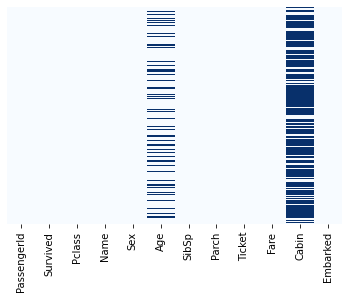

In [16]:
#visualize nulls
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='Blues')

<AxesSubplot:xlabel='Survived', ylabel='count'>

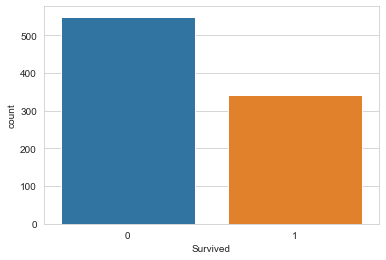

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

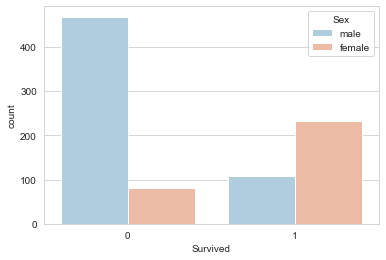

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')
#more females got saved than males

<AxesSubplot:xlabel='Sex', ylabel='count'>

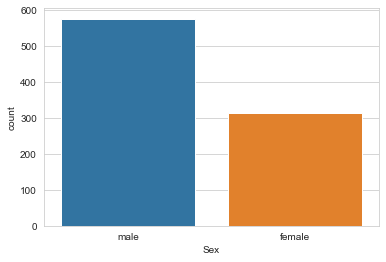

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=data)3

<AxesSubplot:xlabel='Survived', ylabel='count'>

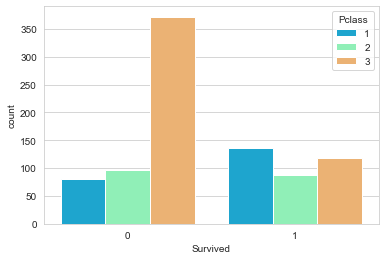

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',palette='rainbow',data=data)
#it is evident that among dead people many ppl belong to 3rd class and less among 1st class

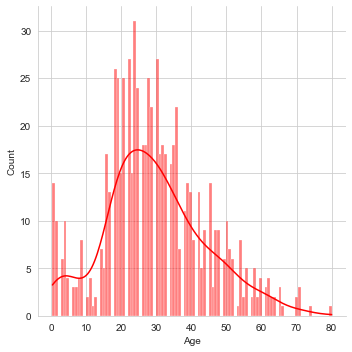

In [30]:
sns.displot(data['Age'].dropna(),kde=True,color='red',bins=100)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

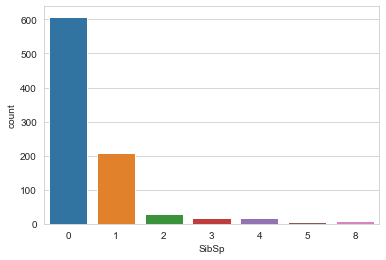

In [32]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

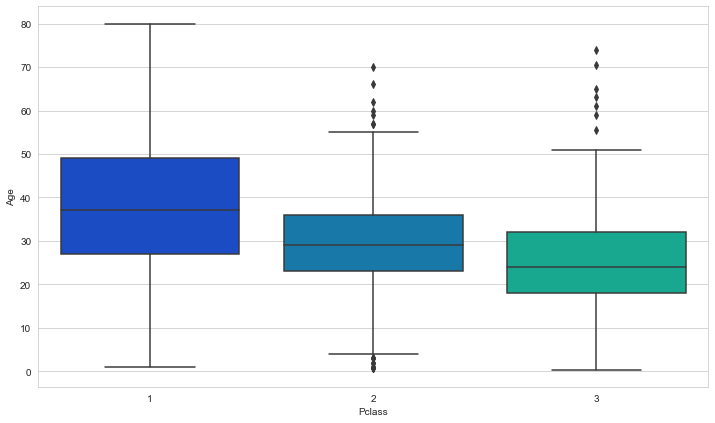

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',palette='winter',data=data)

In [37]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 25
    else :
        return Age
data['Age']=data[['Age','Pclass']].apply(fill_age,axis=1)
data.head()
        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

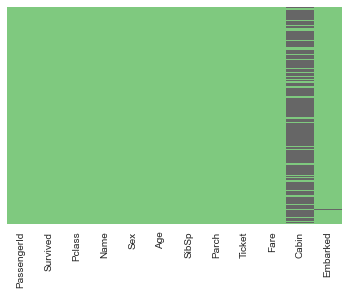

In [39]:
sns.heatmap(data.isnull(),cbar=False,cmap='Accent',yticklabels=False)

In [42]:
data=data.drop('Cabin',axis=1)

<AxesSubplot:>

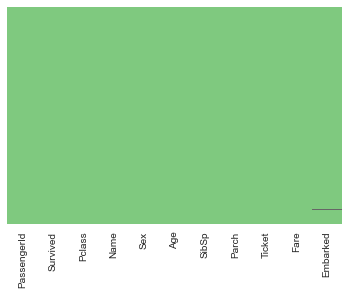

In [45]:
data.head()
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Accent')

In [48]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [49]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [50]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [53]:
data=pd.concat([data,sex,embark],axis=1)

In [54]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
Y=data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [58]:
X=data.drop('Survived',axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [60]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=3)

In [62]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\g likhit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=model.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
accuracy=confusion_matrix(y_pred,y_test)

In [67]:
print(' the accuracy of logistic regression model = ',accuracy)

 the accuracy of logistic regression model =  [[87 17]
 [22 53]]


In [69]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('accuracy using accuracy score = ',accuracy)

accuracy using accuracy score =  0.7821229050279329
